# **STUDENT PERFORMANCE INDICATOR**

## **Life cycle of Machine learning project**

- Understanding th problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choosing the best model

## 1)  Problem Statement

- Project understands how the student's performance is affected by the attributes from the provided dataset

## 2) Data Collection

- Data source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- this data set has 1000 rows and 8 columns of values

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Import the Data.csv as Pandas DataFrame

In [105]:
df = pd.read_csv('data/stud.csv')

In [106]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [107]:
df.shape

(1000, 8)

## 2.2 Dataset information

- gender : sex of students -> (Male/Female) 
- race/ethnicity : ethnicity of students ->(Group A,B,C,D,E)
- parental level of education: parent's final education ->(bachelor's degree, master's degree, associate's degree, high school)
- lunch: having lunch before exam
- test preparation course: complete or in complete before test
- math score
- reading score
- writing score 

### 3. Data Checks to perform

- Check Missing values
- Check Duplicate
- Check data type
- Check the number of the unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [108]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [109]:
df.duplicated().sum()

0

#### There are no duplicate values in this data set

### 3.3 Check Data types

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [111]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [112]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights from above stat

- From above data all means are close to each other between 66 - 68.05;
- All standard deviations are also close between 14.6 - 15.19;
- While there is a minimum score 0 for math, for writing =10 and for reading = 17


### 3.7 Exploring Data

In [113]:
print("Categories in 'gender' variable:           ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:   ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:            ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test preparation course' variable:    ['none' 'completed']


#### Define numerical and categorical features

In [114]:
numerical_features = [ feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical feature : {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features: {} '.format(len(categorical_features),categorical_features))

We have 3 numerical feature : ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


### 3.8 Derived attributes to the table - "Total Score" and "Average"

In [115]:
df['total score'] = df['math score']+df['reading score']+df['writing score']
df['average']= df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [116]:
reading_full = df[df['reading score'] ==100]['average'].count()
math_full = df[df['math score']== 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()


print(f'Numbers of Students with full marks in Reading: {reading_full}')
print(f'Numbers of Students with full marks in Math: {math_full}')
print(f'Numbers of Students with full marks in Writing: {writing_full}')

Numbers of Students with full marks in Reading: 17
Numbers of Students with full marks in Math: 7
Numbers of Students with full marks in Writing: 14


In [117]:
reading_less_20 = df[df['reading score'] <=20]['average'].count()
math_less_20 = df[df['math score'] <=20]['average'].count()
writing_less_20 = df[df['writing score'] <=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths:{math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading:{reading_less_20}')

Number of students with less than 20 marks in Maths:4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading:1


#### Insights

- Students have performed worst in the case of subject: Maths
- Most students scored better in Reading

## 4.Exploring Data (Visualizations)

### 4.1 Visualize average score distributions to make some conclusion

- Histogram
- Kernel Distribution Function

### 4.1.1 Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

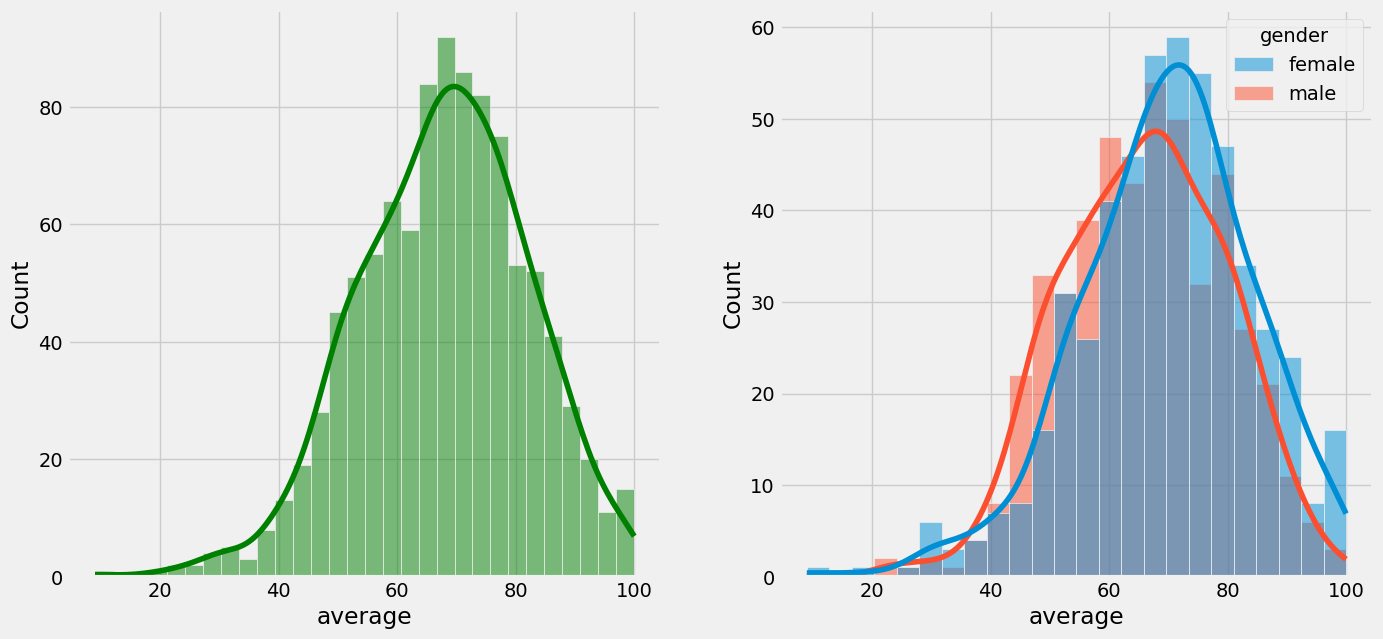

In [118]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', kde=True, hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

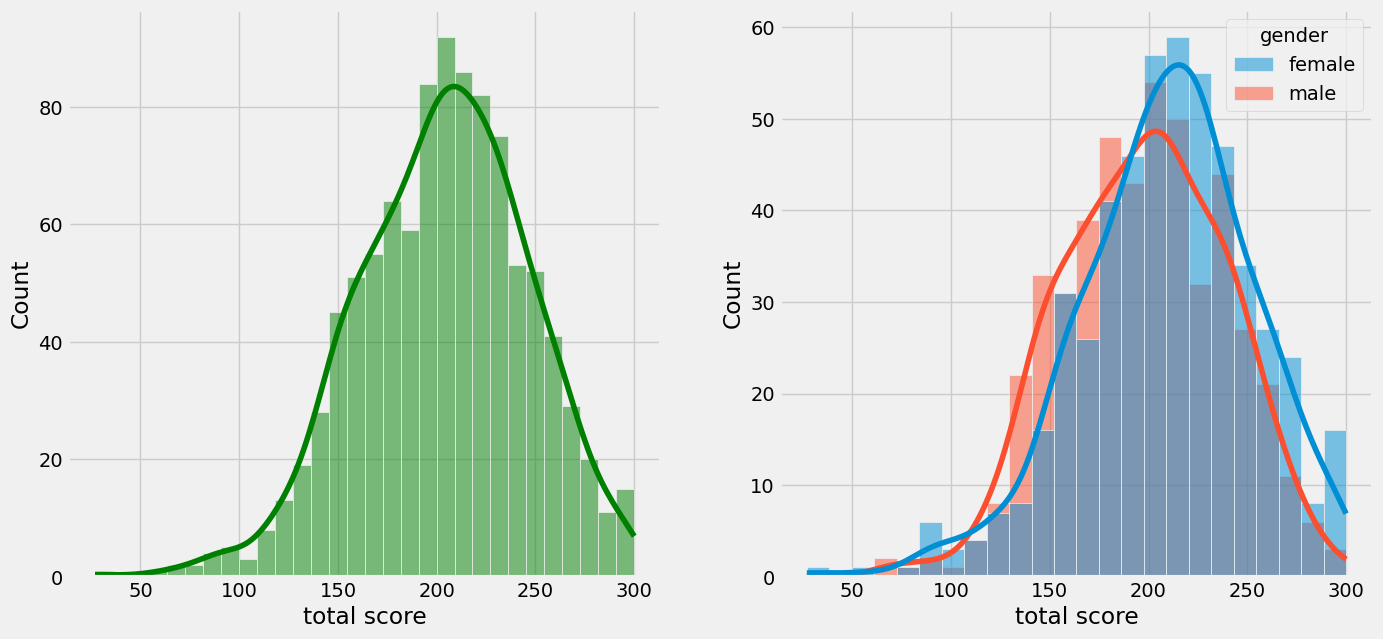

In [119]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score',bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score', kde=True, hue='gender')

#### Insights

Female students is better performer than male students

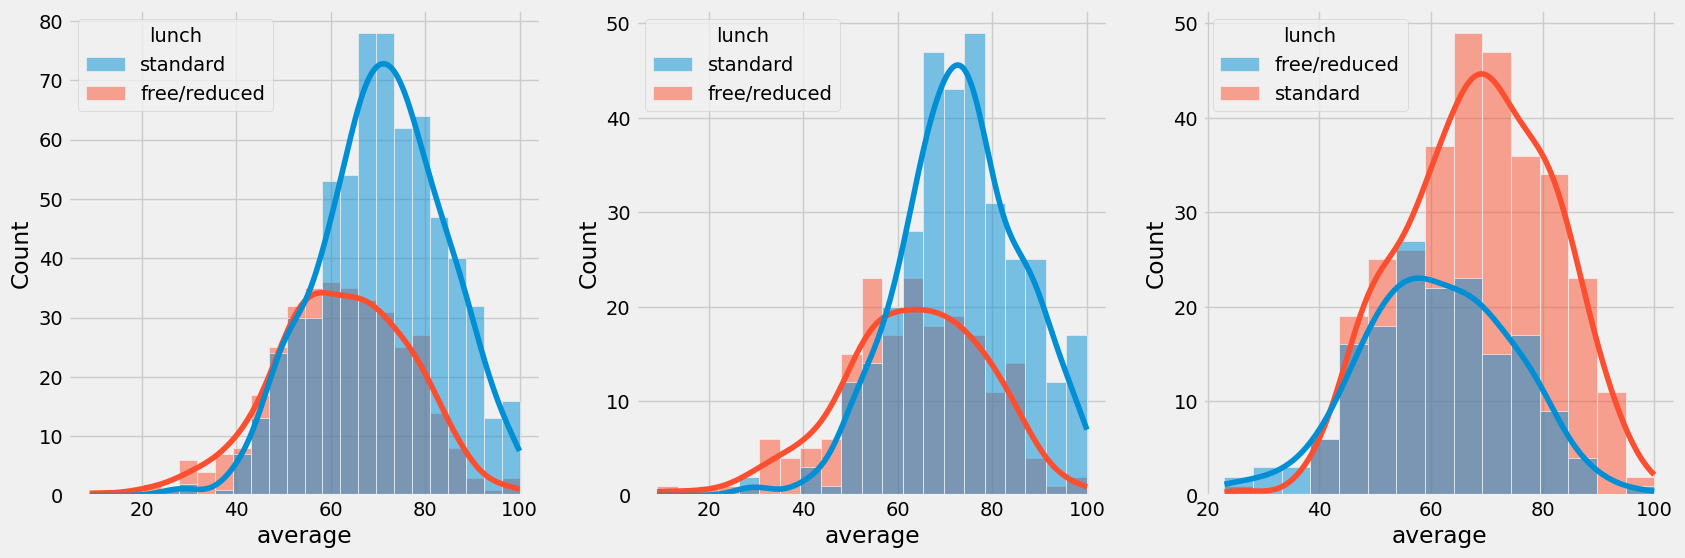

In [120]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x = 'average',kde = True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch')
plt.show()

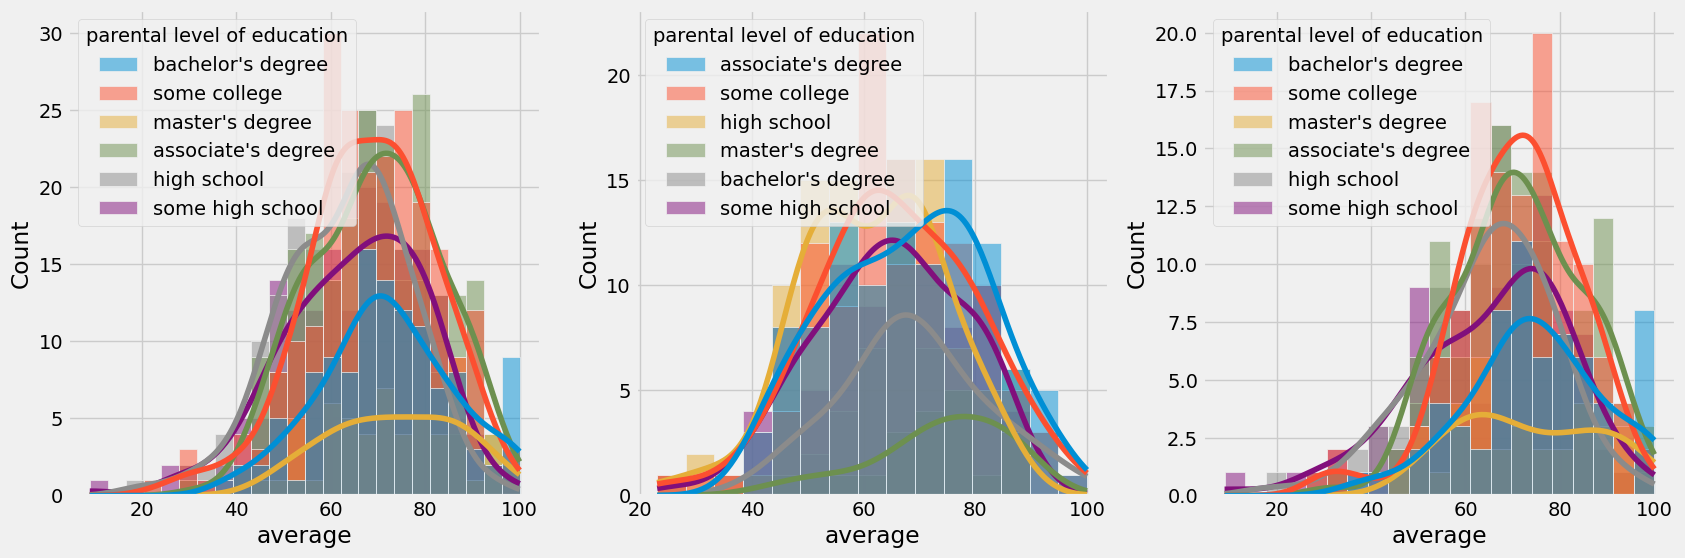

In [121]:
#Comparing with respect to parental education
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data = df, x ='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data= df[df.gender=='male'], x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],  x='average',kde=True,hue='parental level of education')
plt.show()


#### Insights

- in general parents education don't help student perform well in exam.
- 2nd plot shows that parents whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot there is no effect of parent's education on female studenst

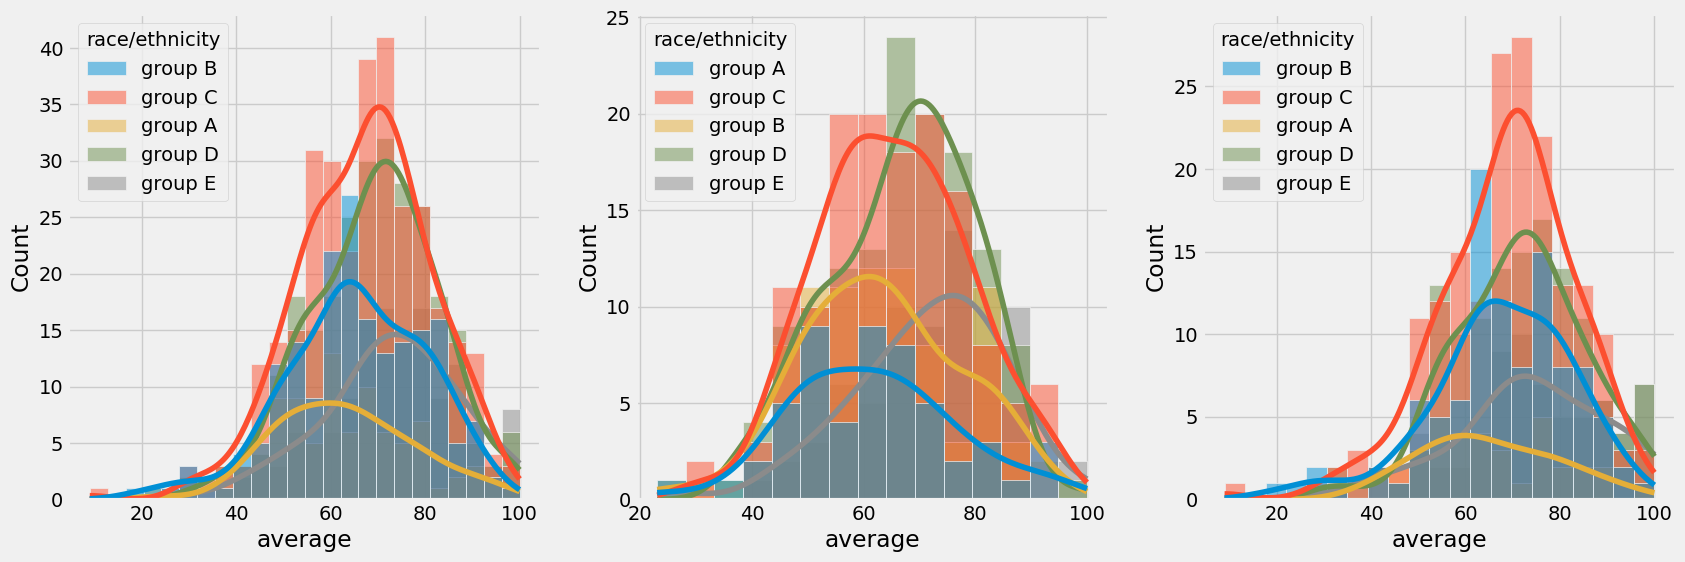

In [122]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True,hue='race/ethnicity')
plt.subplot(142)
ax= sns.histplot(data = df[df.gender=='male'],x='average',kde=True, hue ='race/ethnicity')
plt.subplot(143)
ax= sns.histplot(data = df[df.gender=='female'],x='average',kde=True, hue ='race/ethnicity')
plt.show()


#### Insights

- Students whom belong to group A and group B are the ones performing poorly compared to other groups and it's irrespective of their gender too.

### 4.2 Maximum score of students in all subjects

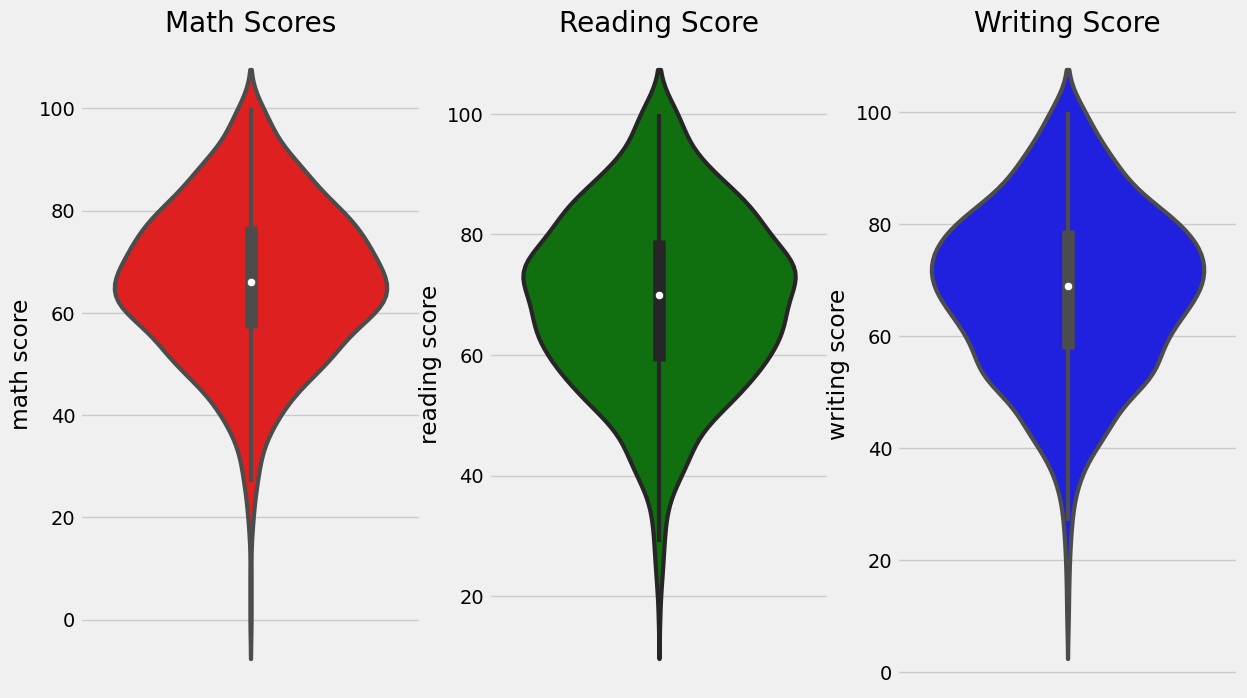

In [123]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score', data=df,color='blue',linewidth=3)
plt.show()

#### Insights

- From the above plot reading and writing score, most students performed between 50-80
- in math most students performed in range 60-80


### 4.3 Mutivariate analysis using pieplot

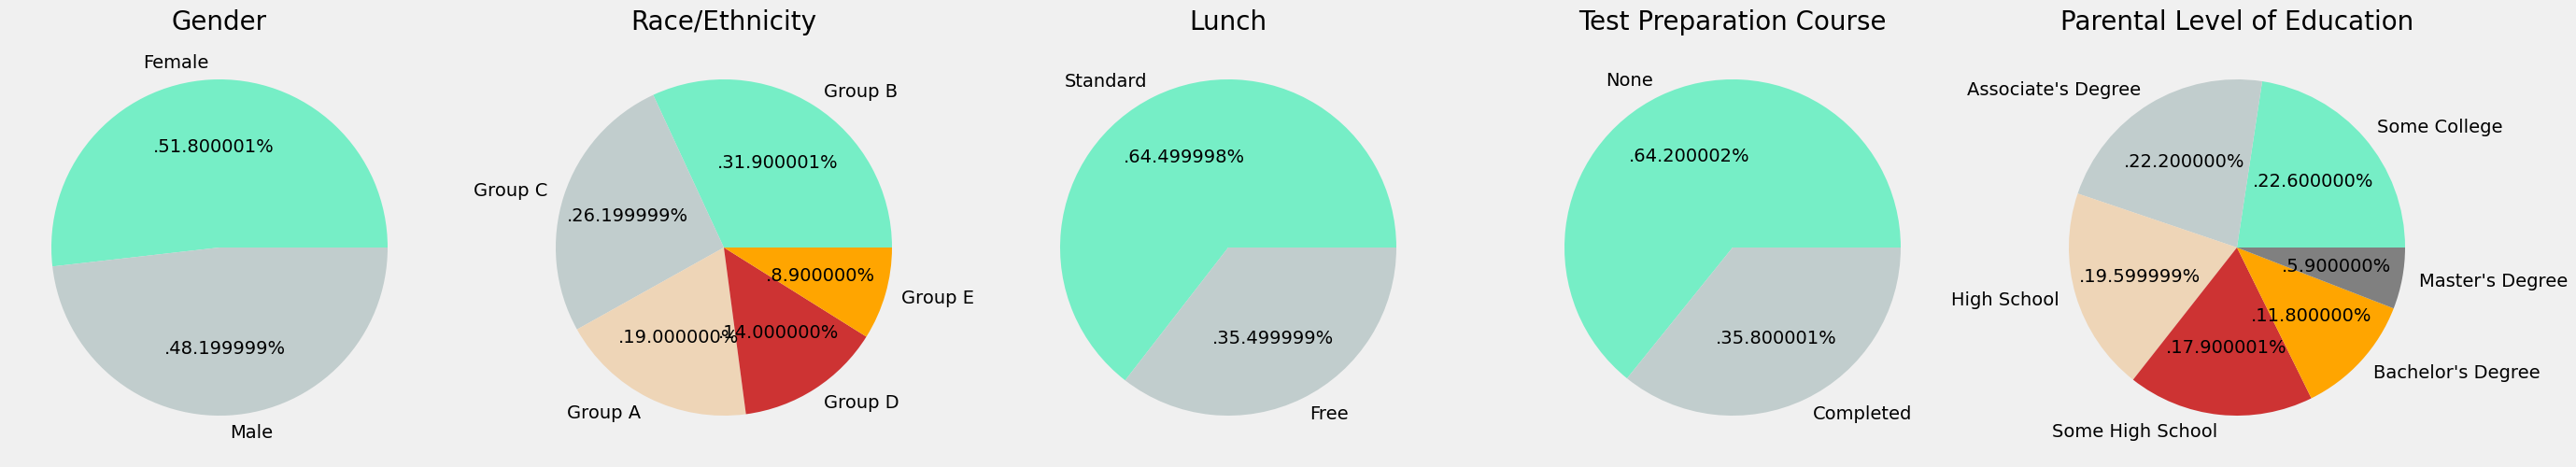

In [124]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['#76EEC6','#C1CDCD']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group B','Group C','Group A','Group D','Group E'
color = ['#76EEC6','#C1CDCD','#EED5B7','#CD3333','orange']

plt.pie(size, colors = color, labels= labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize =20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['#76EEC6','#C1CDCD']

plt.pie(size, colors = color, labels= labels, autopct='.%2f%%')
plt.title('Lunch', fontsize =20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['#76EEC6','#C1CDCD']

plt.pie(size, colors = color, labels= labels, autopct='.%2f%%')
plt.title('Test Preparation Course', fontsize =20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College',"Associate's Degree","High School","Some High School", "Bachelor's Degree","Master's Degree"
color = ['#76EEC6','#C1CDCD','#EED5B7','#CD3333','orange','grey']

plt.pie(size, colors = color, labels= labels, autopct='.%2f%%')
plt.title('Parental Level of Education', fontsize =20)
plt.axis('off')

plt.tight_layout
plt.grid()
plt.show()


#### Insights

- Number of male and female students are almost equal
- Number of students are higher in Group C
- Number of students who have standard lunch is greater
- Number of students who have not enrolled in any test preparation course is greater
- More students parental education is "Some College" and followed by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1Gender Column

- Distribution of gender
- Is gender has any impact on student's performance

## Univariate Analysis

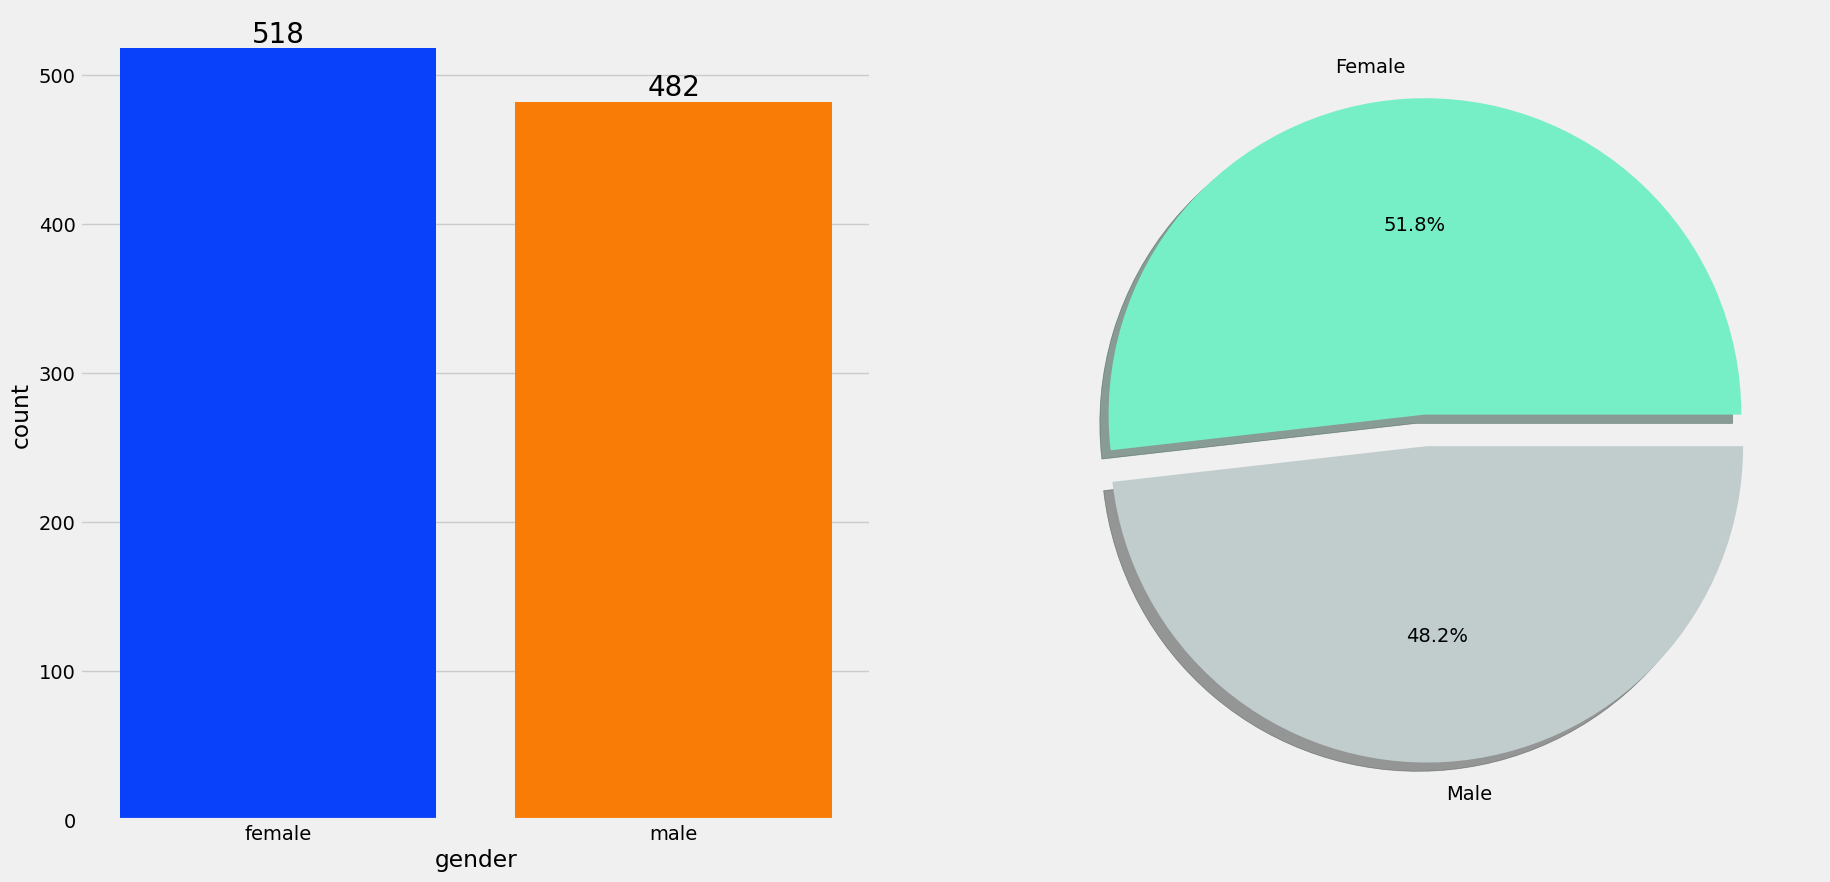

In [125]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x =df['gender'].value_counts(), labels=['Female','Male'], explode=[0,0.1],autopct='%1.1f%%',shadow =True, colors=['#76EEC6','#C1CDCD'])
plt.show()


#### Insights

Gender has almost balanced data with Female students of 518(52%) and male students of 482(48%)

### Bivariate Analysis (gender impact on student's performance)

In [126]:
gender_group =df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


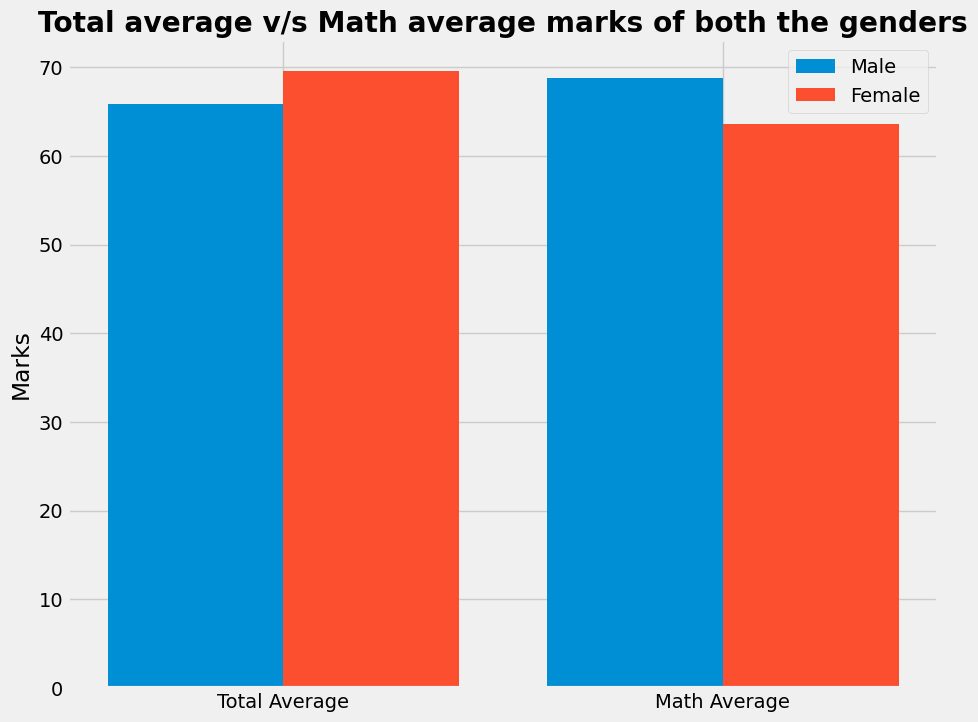

In [127]:
plt.figure(figsize=(10,8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0],gender_group['math score'][0]]
male_scores = [gender_group['average'][1],gender_group['math score'][1]]

x_axis = np.arange(len(X))

plt.bar(x_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(x_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights

- In total average female students tend to perform well, however in case of maths the male students have a small increase in performance

### 4.4.2 Race/Ethnicity Column

#### Univariate Analysis ( How is Group wise distribution ?)

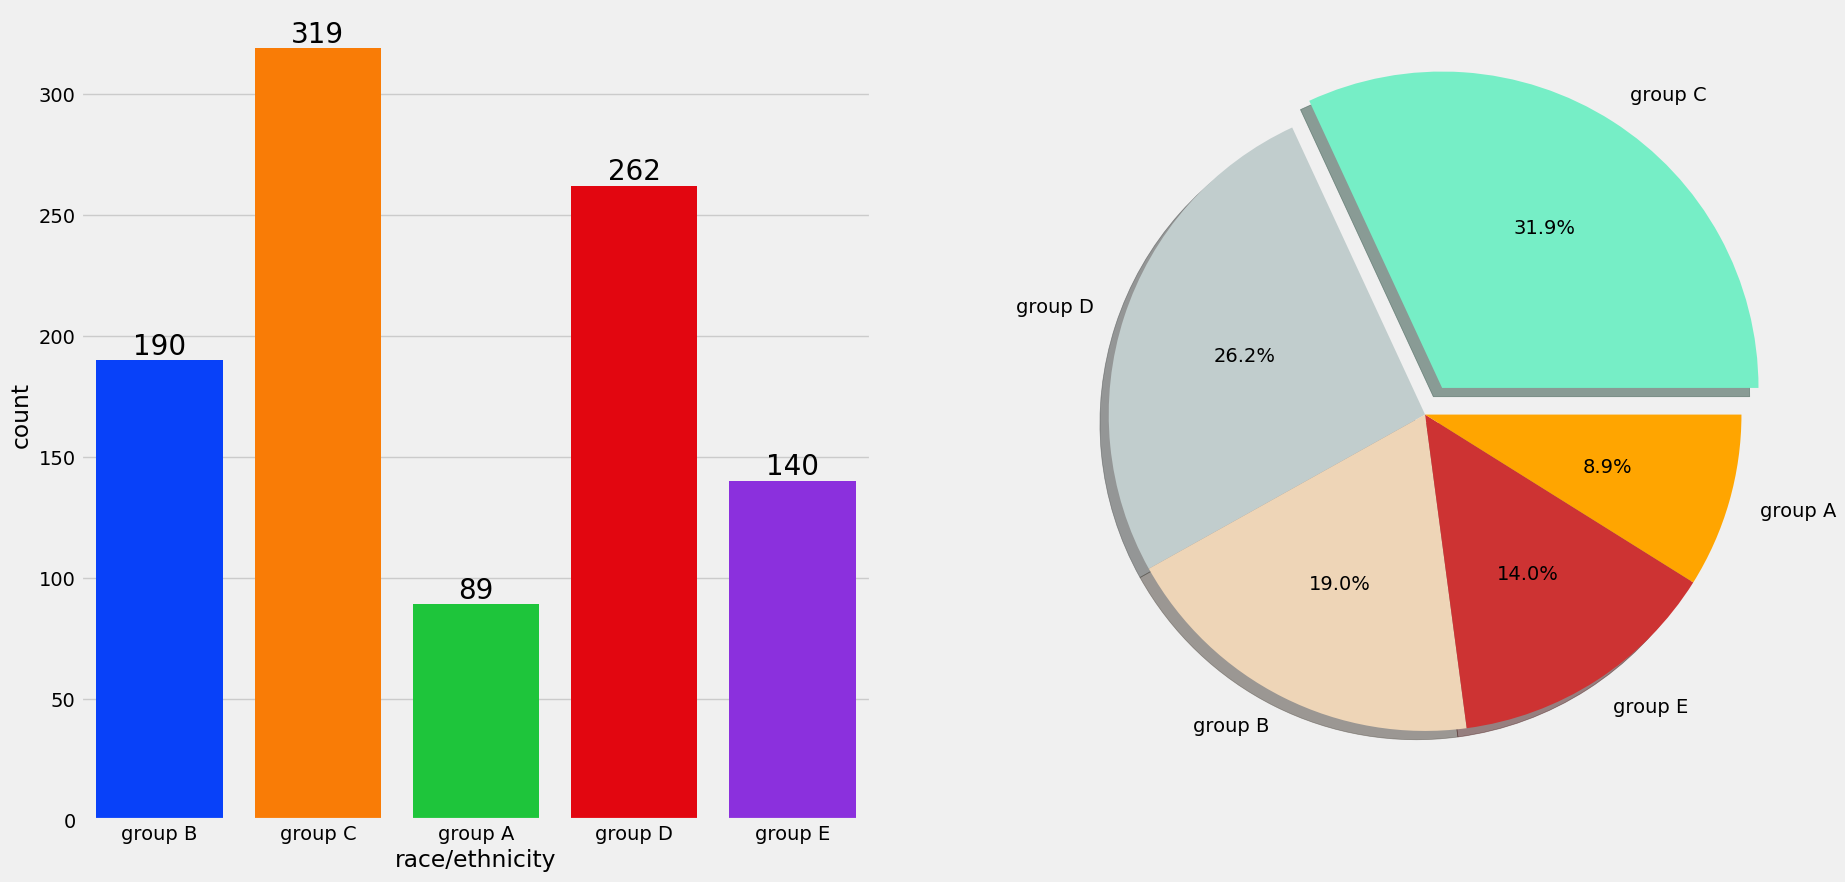

In [128]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#76EEC6','#C1CDCD','#EED5B7','#CD3333','orange'])
plt.show()   


#### Bivariate Analysis ( Is Race/Ehnicity has any impact on student's performance ? )

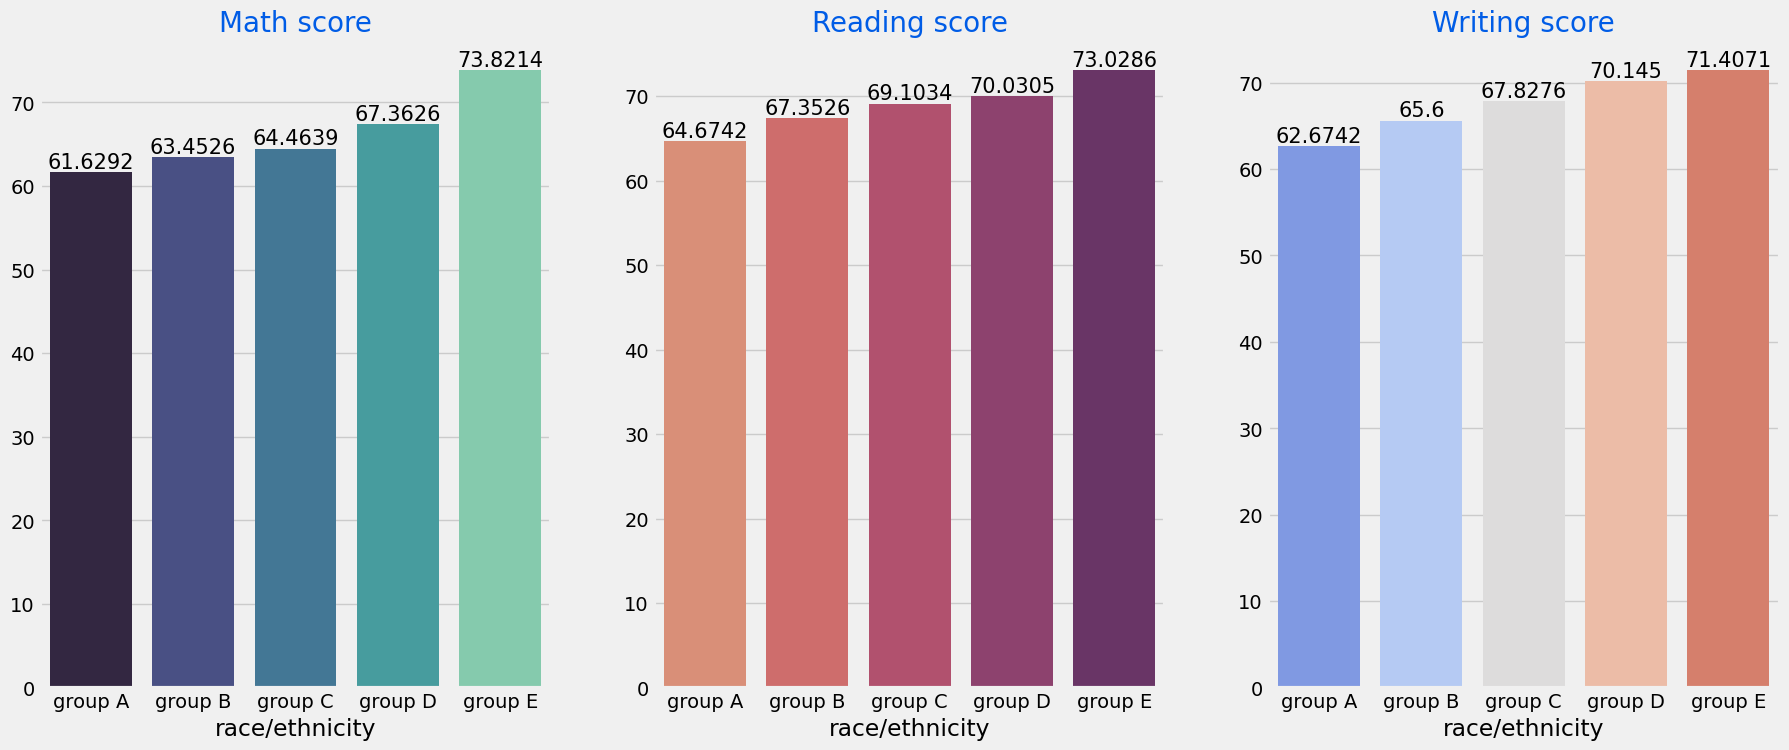

In [129]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights

- group E performed the best and group A performed the least

#### 4.4.3 Parental Level of Education

- Does parent education can make any difference in student education

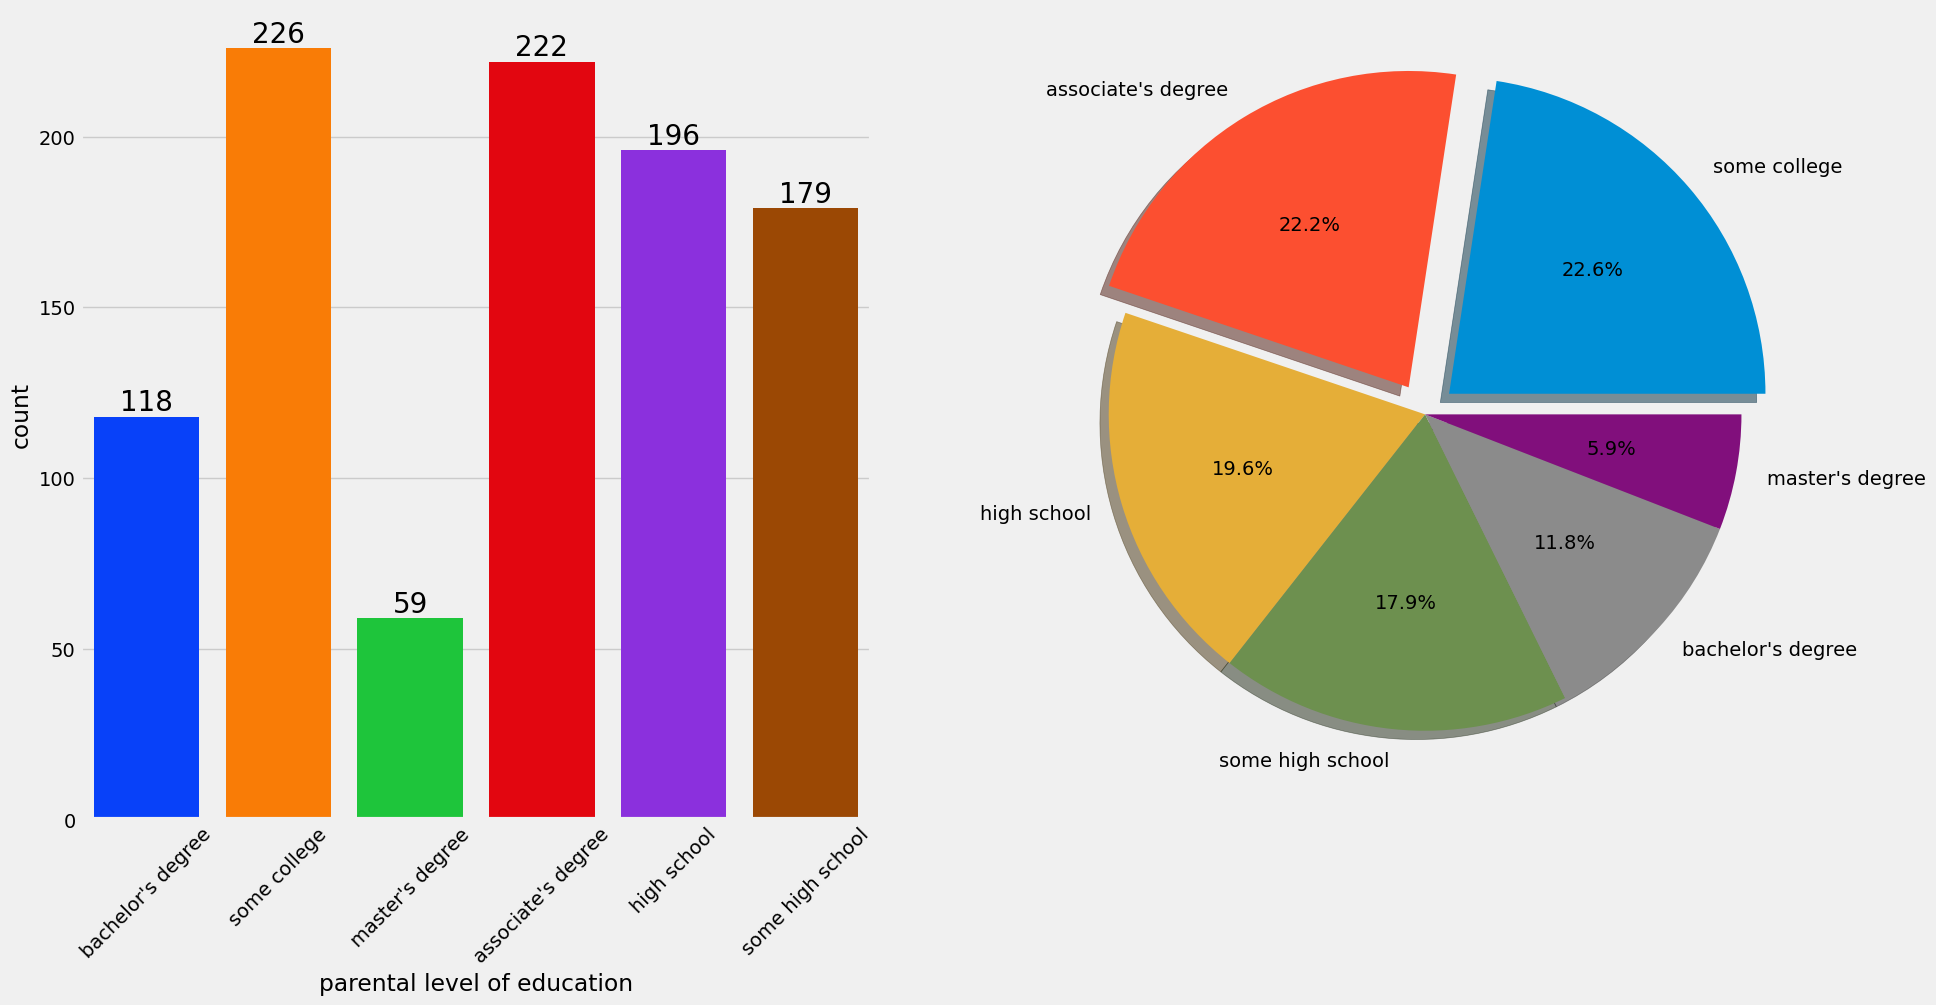

In [150]:
f,ax=plt.subplots(1,2,figsize=(20,10))
chart = sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,explode=[0.1,0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Bivariate Analysis

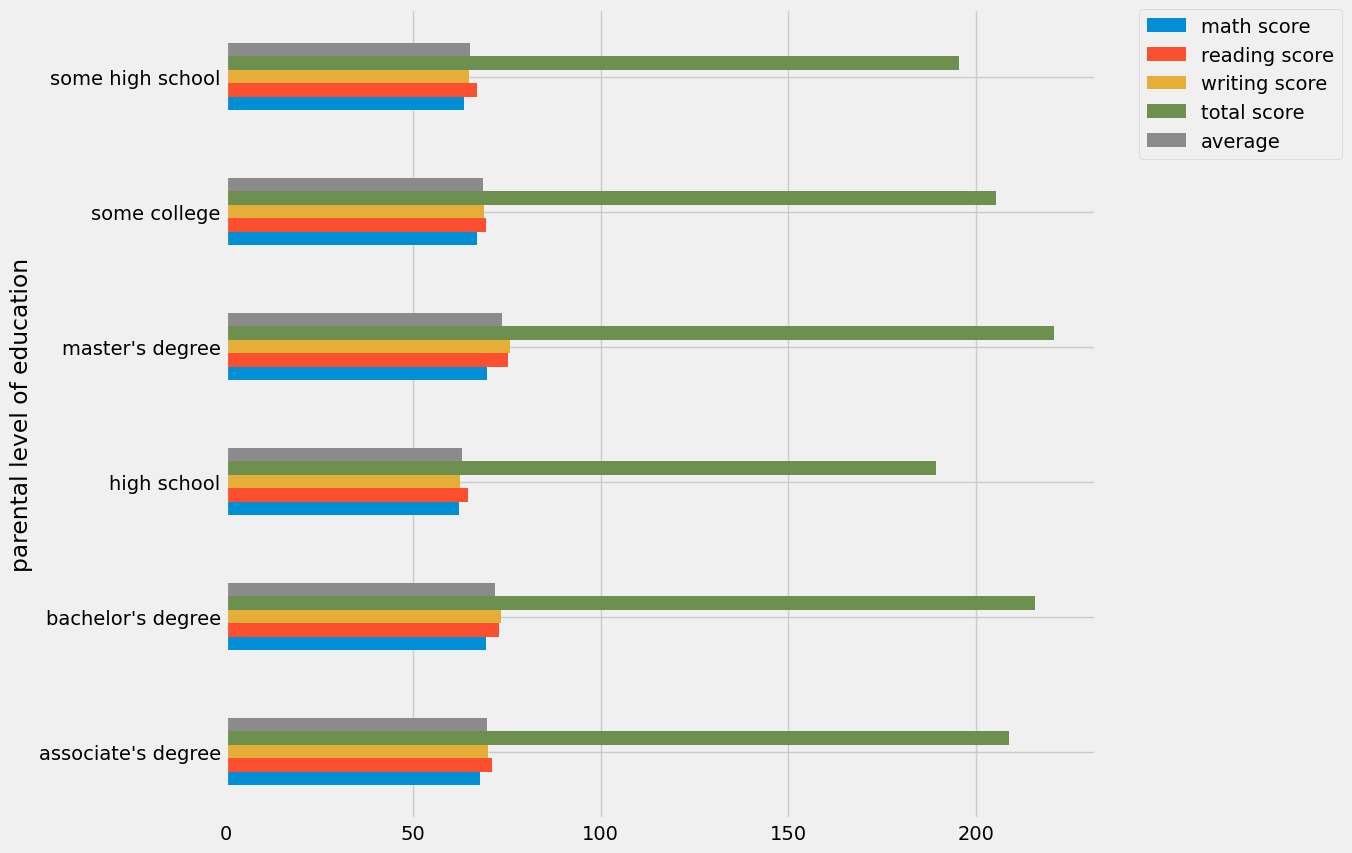

In [152]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insight

- The score of student whose parents has a master or bachelor's degree have higher total score than others

### 4.4.4 Lunch column

- effect of lunch type in students

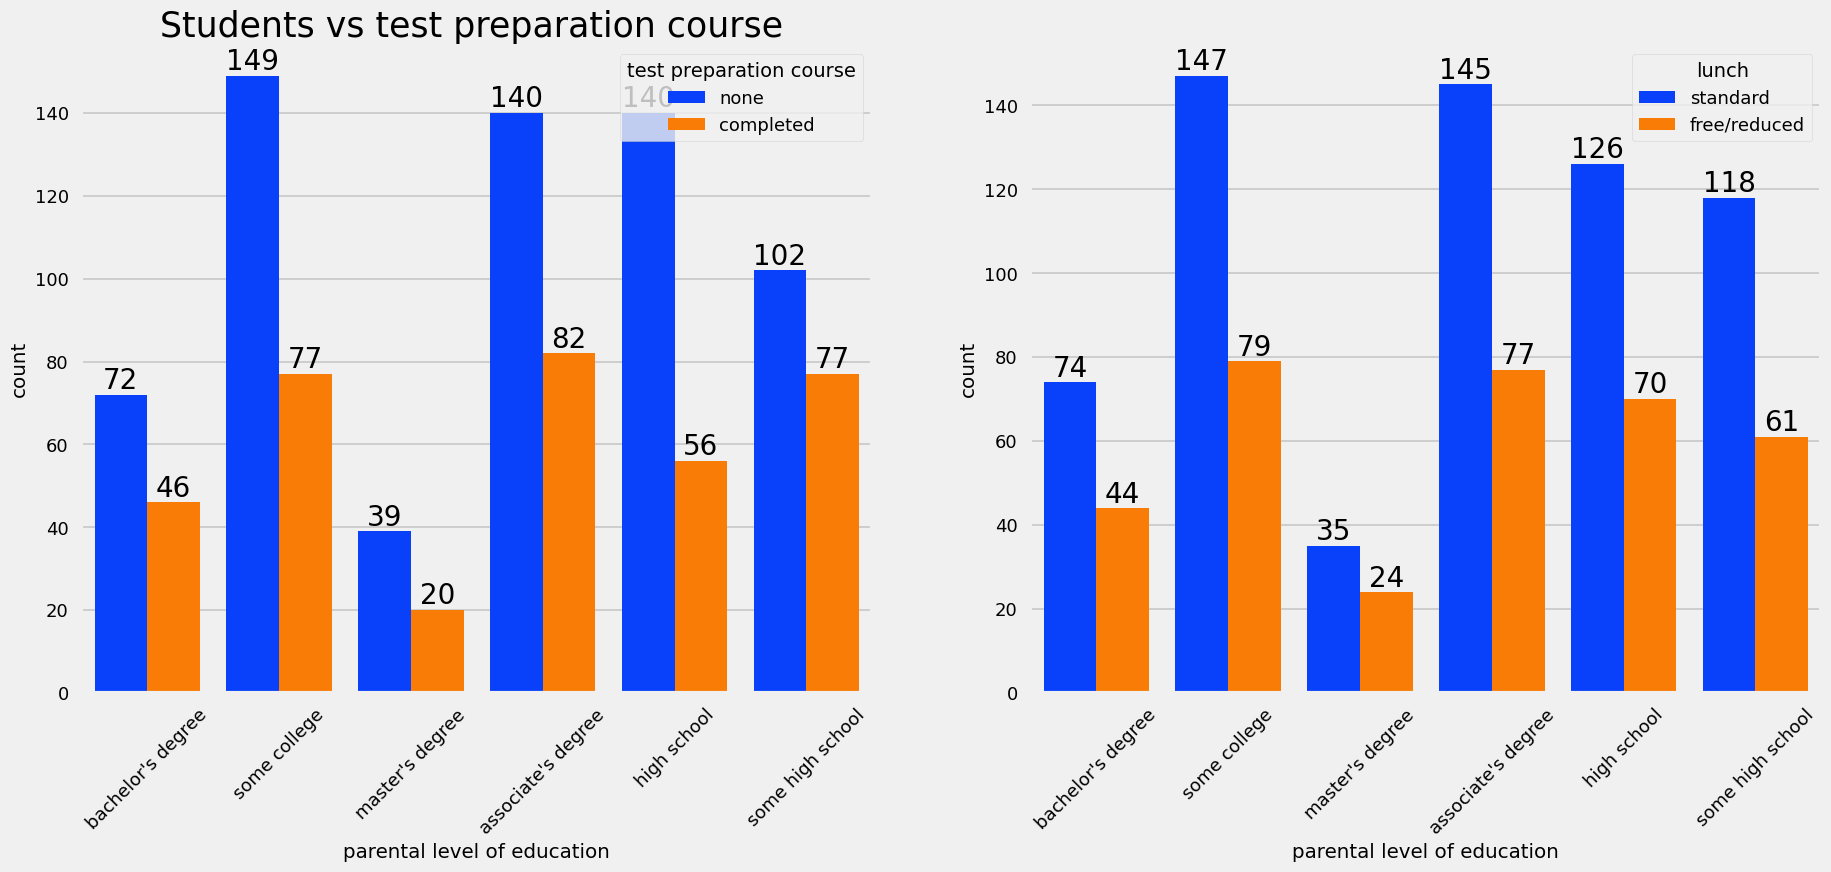

In [158]:
f,ax=plt.subplots(1,2,figsize=(20,8))
chart = sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
chart = sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights

- Students who gets standard lunch have good performance characterstics than students who are using free/reduced lunch

#### Bivariate Analysis( Test Preparation course impacts)

<Axes: xlabel='lunch', ylabel='writing score'>

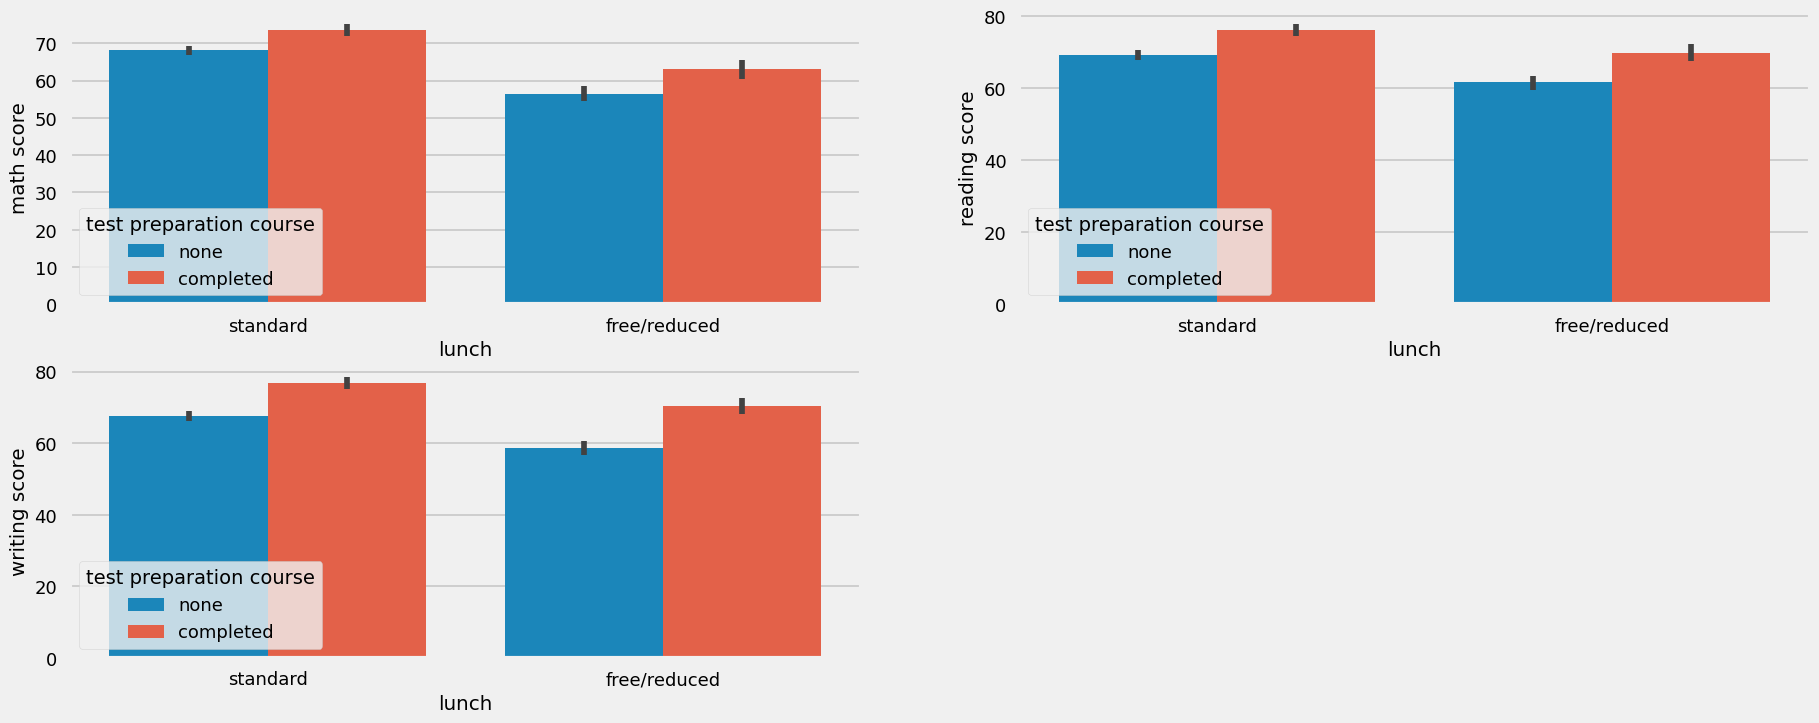

In [161]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights

- students who has undergone test preperation course has some improved performance over the students who haven't  

### 4.4.6 Checking Outliers

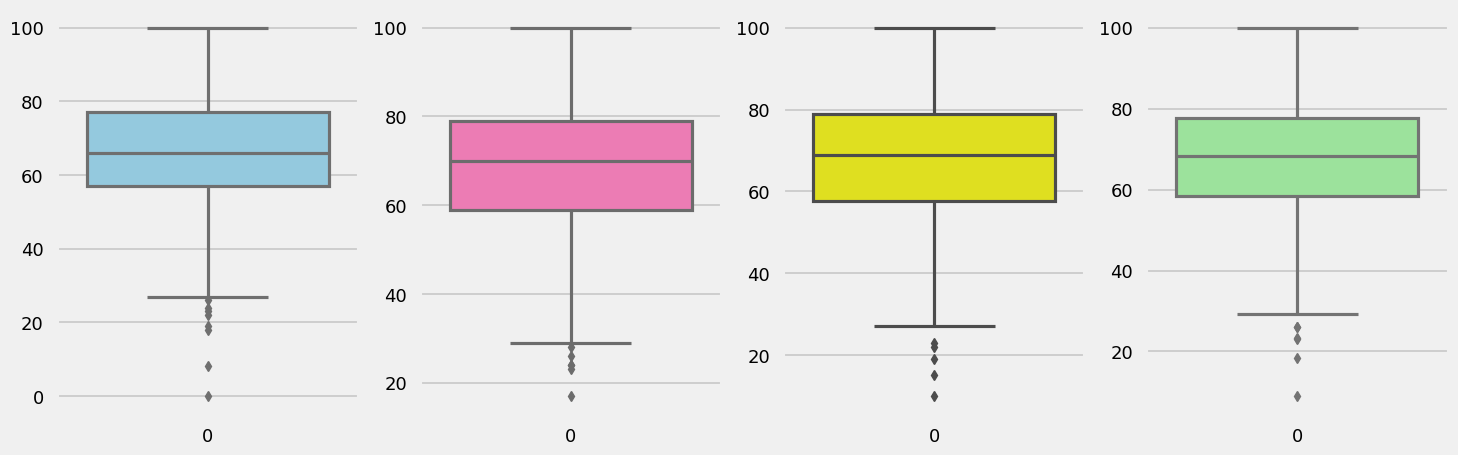

In [162]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 Mutivariate analysis using pairplot

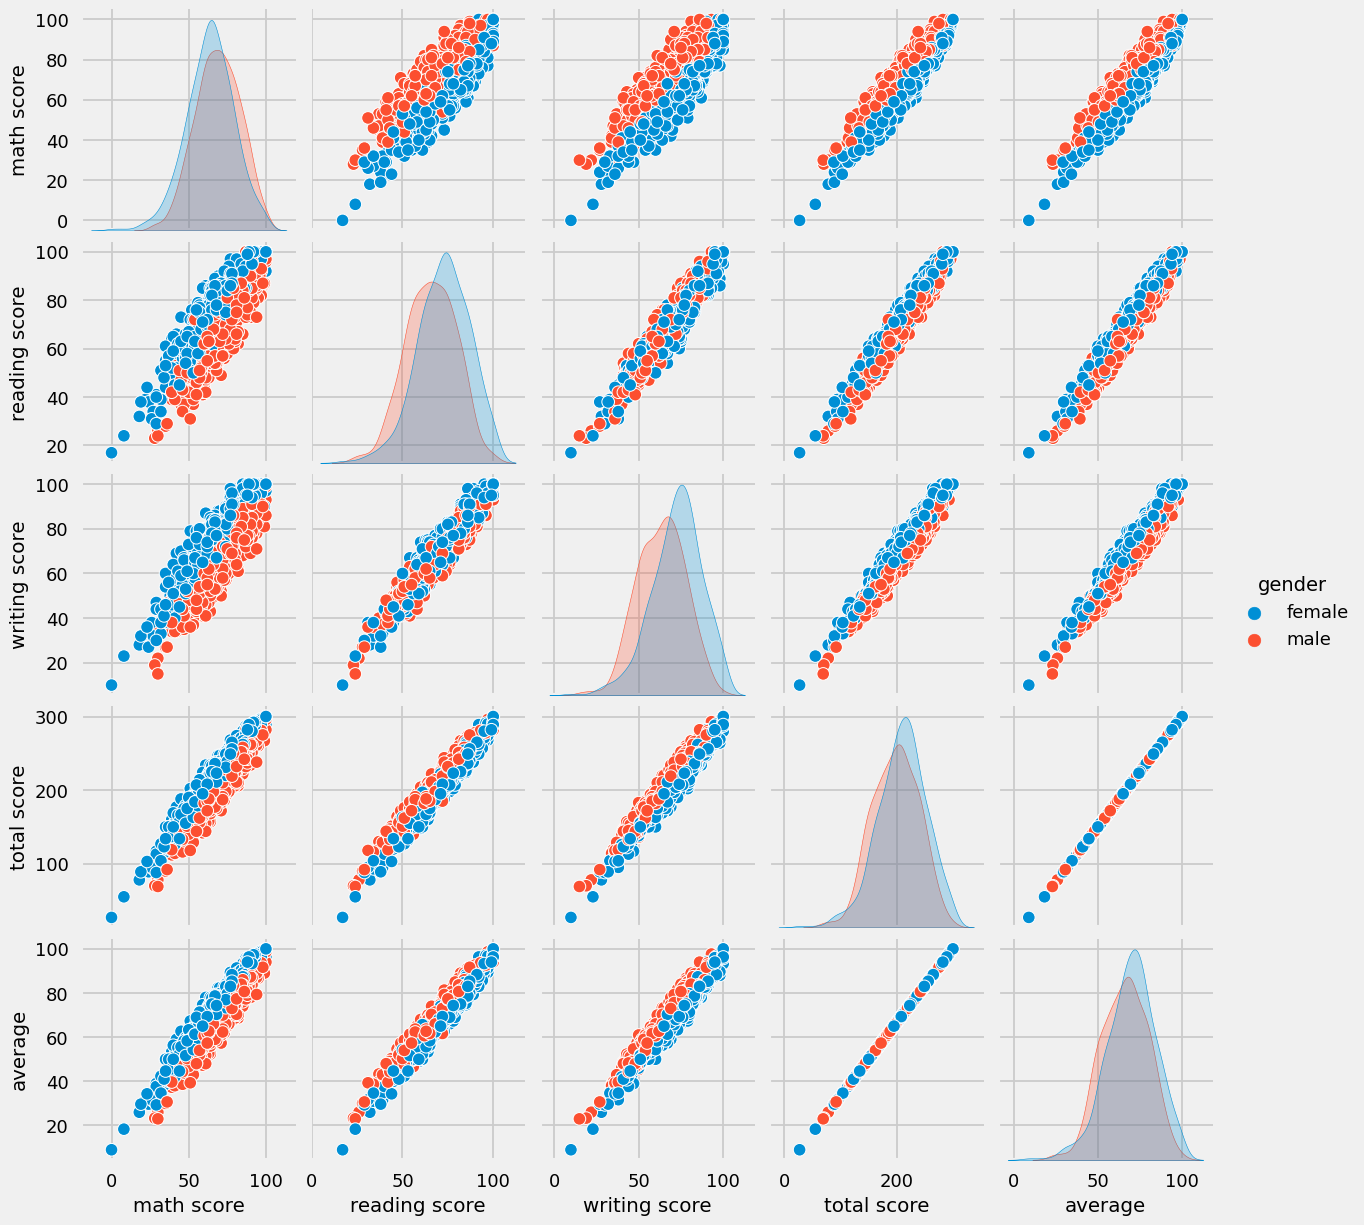

In [163]:
sns.pairplot(df,hue='gender')
plt.show()

#### Insights

- Scores increase linearly as comparing one to another

### 5. Conclusions

- Student's performance have strong support from attributes such as lunch, race/ethnicity, parental level of education
- Female scores more overall
- students performance doesn't have much effect from attribute test preperation course, however student who took the course had a tid bit more score than others